In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
smartphones = pd.read_csv('smartphones.csv')
smartphones

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0


In [4]:
count = smartphones.Ram.value_counts()
category = count.index
count, category

(4    3
 2    3
 3    2
 1    1
 Name: Ram, dtype: int64,
 Int64Index([4, 2, 3, 1], dtype='int64'))

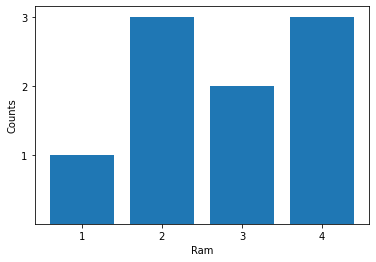

In [5]:
plt.bar(category, count)
plt.xlabel('Ram')
plt.ylabel('Counts')
plt.xticks([1, 2, 3, 4])
plt.yticks([1, 2, 3])
plt.show()

### ECDF (Empirical cumulative distribution function)

In [6]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [7]:
x, y = ECDF(smartphones.inch)
x, y

(array([4. , 4.7, 5. , 5. , 5.1, 5.2, 5.5, 5.7, 5.8]),
 array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
        0.66666667, 0.77777778, 0.88888889, 1.        ]))

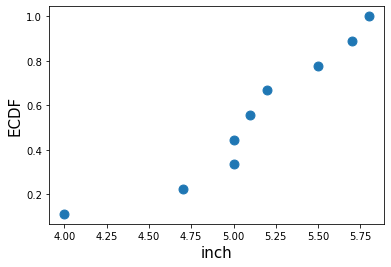

In [9]:
plt.scatter(x, y, s=80)
plt.margins(0.05)
plt.xlabel('inch', fontsize=15)
plt.ylabel('ECDF', fontsize=15)
plt.show()

#### Mean

In [10]:
np.mean(smartphones.inch)

5.111111111111111

#### Median

In [11]:
np.median(smartphones.inch)

5.1

#### Percentile

In [12]:
np.percentile(smartphones.inch, [25, 50, 75])

array([5. , 5.1, 5.5])

#### variance and standard deviation

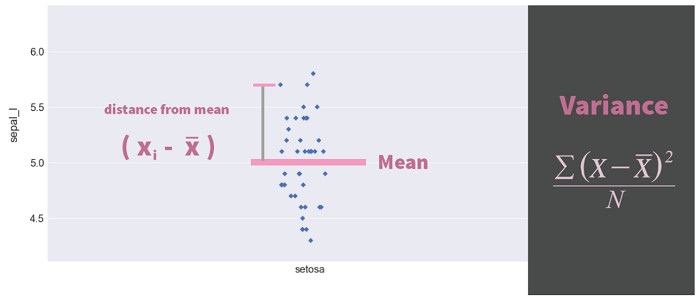

In [15]:
diff = smartphones.Ram - np.mean(smartphones.Ram)
var = np.mean(diff **2)
var

1.0617283950617284

In [14]:
np.std(smartphones.Ram)

1.0304020550550783

#### Covariance

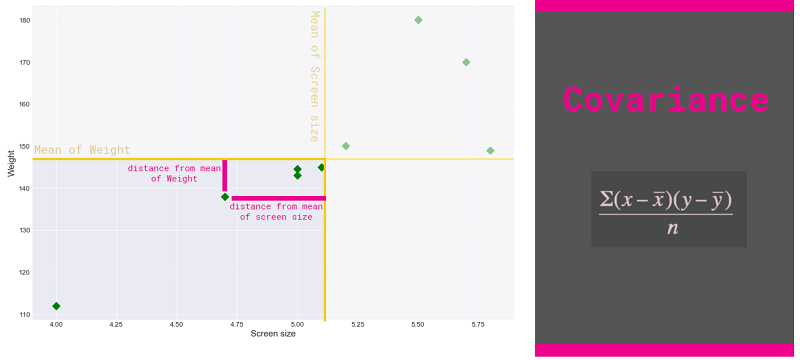

In [16]:
np.cov(smartphones.inch, smartphones.Weight)

array([[3.01111111e-01, 8.91944444e+00],
       [8.91944444e+00, 3.69402778e+02]])

### Correlation

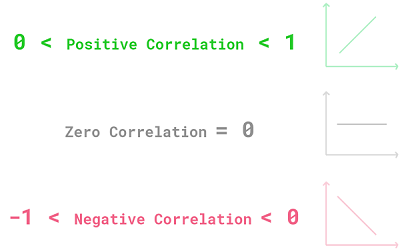

## Parametric Methods

### Pearson Correlation

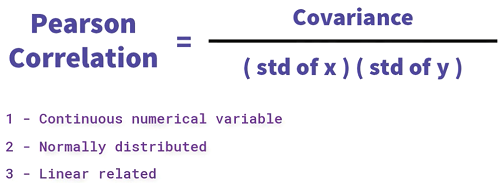

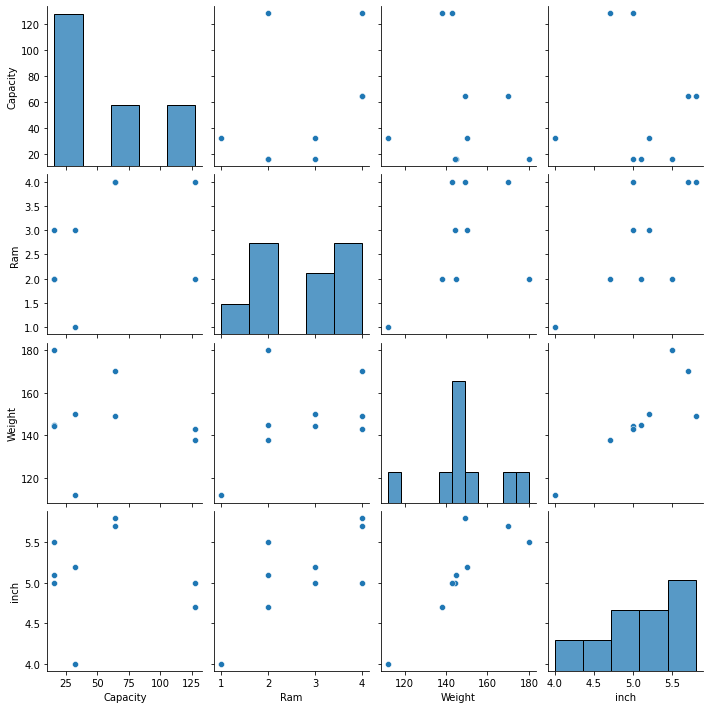

In [23]:
import seaborn as sns
sns.pairplot(smartphones);

In [25]:
from scipy.stats import pearsonr
pearsons_coefficent, p_value = pearsonr(smartphones.inch, smartphones.Weight)
pearsons_coefficent, p_value

(0.8457155883705422, 0.0040705879684336975)

#### Using pandas for calculate the pearson correlation coefficient

In [27]:
corr = smartphones[['inch', 'Weight']].corr()
corr

,inch,Weight
inch,1.000000,0.845716
Weight,0.845716,1.000000


#### seaborn for visualize pearson correlation coefficient

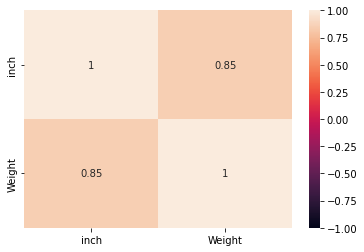

In [29]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, annot=True);

## Nonparametric Methods

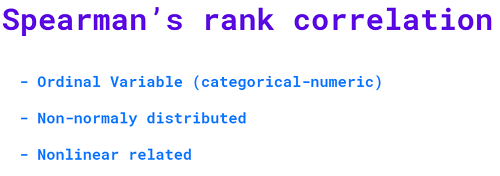

In [31]:
from scipy.stats import spearmanr
spearmanr_coefficent, p_value = spearmanr(smartphones.Capacity, smartphones.Ram)
spearmanr_coefficent, p_value

(0.4419819033287751, 0.23359832766016075)

### Chi-square test

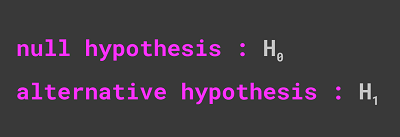

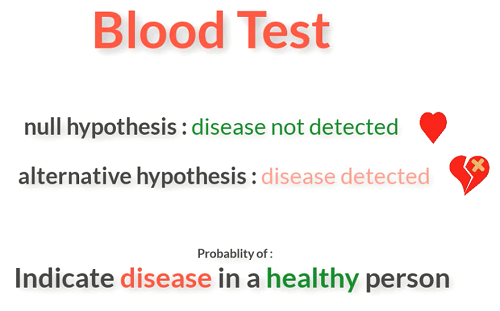

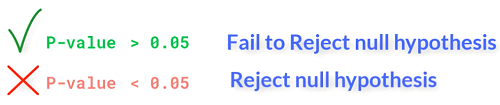

In [32]:
from scipy.stats import chi2_contingency

In [34]:
table = pd.crosstab(smartphones.Capacity, smartphones.Ram)
chi2, p_value, dof, expected = chi2_contingency(table.values)
chi2, p_value, dof, expected

(12.25,
 0.19957963261092318,
 9,
 array([[0.33333333, 1.        , 0.66666667, 1.        ],
        [0.22222222, 0.66666667, 0.44444444, 0.66666667],
        [0.22222222, 0.66666667, 0.44444444, 0.66666667],
        [0.22222222, 0.66666667, 0.44444444, 0.66666667]]))